DATA SCIENCE

T094 : Shubhangi Mane

PRACTICAL NO : 6
Regression and Its Types
 Implement simple linear regression using a dataset.
 Explore and interpret the regression model coefficients and goodness-of-fit
measures.
 Extend the analysis to multiple linear regression and assess the impact of
additional predictors.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

import data

In [ ]:
import pandas as pd

# Load the uploaded synthetic dataset
df = pd.read_csv("StudentsPerformance_REAL.csv")

# Show first 5 rows
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group C,master's degree,standard,completed,38.492316,71,76.593456
1,male,group B,bachelor's degree,standard,completed,29.206518,34,33.219763
2,female,group A,bachelor's degree,standard,none,76.425708,91,78.959566
3,male,group C,some high school,standard,completed,77.684220,80,71.332996
4,female,group D,associate's degree,standard,completed,43.881457,40,41.354982


In [ ]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   float64
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB
None
        math score  reading score  writing score
count  1000.000000    1000.000000    1000.000000
mean     46.354802      58.117000      52.189973
std      20.978642      23.093822      21.281229
min       0.000000      20.000000       6.476942
25

In [ ]:
df.describe()


,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,46.354802,58.117000,52.189973
std,20.978642,23.093822,21.281229
min,0.000000,20.000000,6.476942
25%,29.812467,38.000000,34.737980
50%,46.367669,57.000000,51.842035
75%,62.813349,79.000000,69.602964
max,94.020225,99.000000,96.102050


from matplotlib import pyplot as plt
_df_8['math score'].plot(kind='hist', bins=20, title='math score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['reading score'].plot(kind='hist', bins=20, title='reading score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['writing score'].plot(kind='hist', bins=20, title='writing score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='math score', y='reading score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12.plot(kind='scatter', x='reading score', y='writing score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['math score'].plot(kind='line', figsize=(8, 4), title='math score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['reading score'].plot(kind='line', figsize=(8, 4), title='reading score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['writing score'].plot(kind='line', figsize=(8, 4), title='writing score')
plt.gca().spines[['top', 'right']].set_visible(False)

Data Distribution Plot

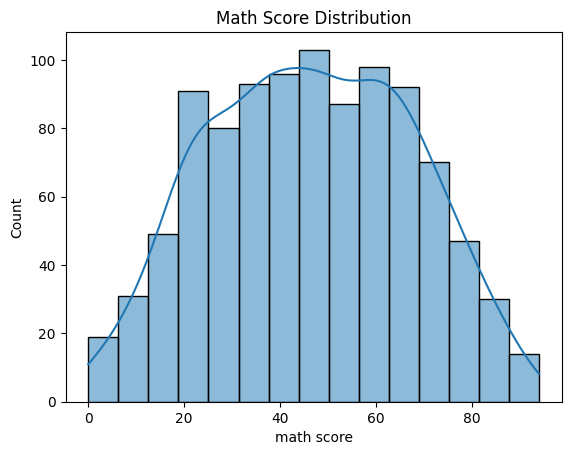

In [ ]:
plt.title('Math Score Distribution')
sns.histplot(df['math score'], kde=True)
plt.show()


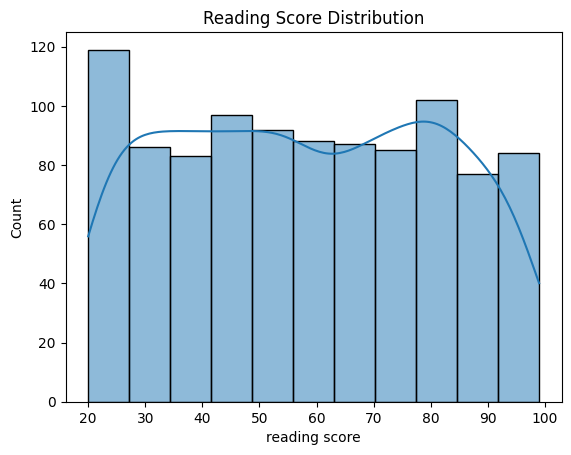

In [ ]:
plt.title('Reading Score Distribution')
sns.histplot(df['reading score'], kde=True)
plt.show()


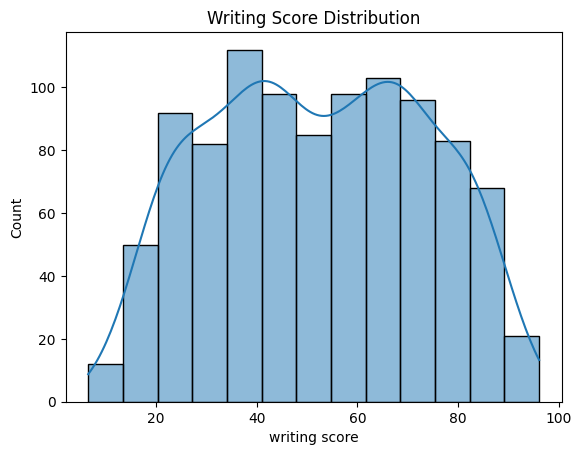

In [ ]:
plt.title('Writing Score Distribution')
sns.histplot(df['writing score'], kde=True)
plt.show()


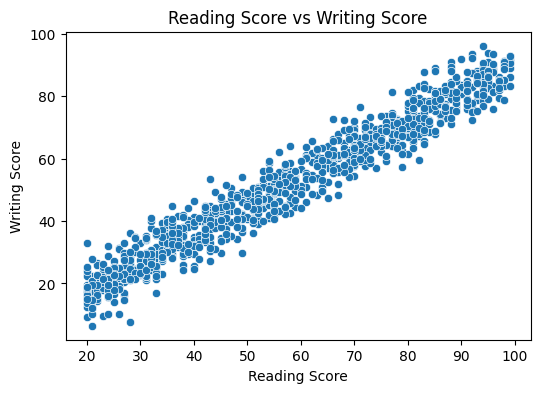

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['reading score'], y=df['writing score'])
plt.title("Reading Score vs Writing Score")
plt.xlabel("Reading Score")
plt.ylabel("Writing Score")
plt.show()


Reading score is an predictor of writing score in this dataset.
 The relationship is strong, positive, and linear.

X–y split for your dataset (Reading = independent, Writing = dependent):

In [ ]:
df.columns


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
# Independent variable (Reading Score)
X = df[['reading score']]

# Dependent variable (Writing Score)
y = df['writing score']

print(X.head())
print(y.head())


   reading score
0             71
1             34
2             91
3             80
4             40
0    76.593456
1    33.219763
2    78.959566
3    71.332996
4    41.354982
Name: writing score, dtype: float64


split into train and test sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)


Train shapes: (800, 1) (800,)
Test shapes: (200, 1) (200,)


Train the regression model

In [ ]:
from sklearn.linear_model import LinearRegression

# Create object
regressor = LinearRegression()

# Train the model
regressor.fit(X_train, y_train)


LinearRegression()

Predict writing score for a new reading score

Example: Predict writing score when reading score = 80

In [ ]:
# Predict writing score for a new reading score
reading_value = [[80]]   # input must be 2D

predicted_writing = regressor.predict(reading_value)

print("Predicted Writing Score:", predicted_writing[0])


Predicted Writing Score: 71.76410519154534


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predict for the test dataset

In [ ]:
y_pred = regressor.predict(X_test)

print("Actual Writing Scores:\n", y_test.head())
print("Predicted Writing Scores:\n", y_pred[:5])


Actual Writing Scores:
 521    60.530585
737    10.218132
740    53.411632
660    43.707064
411    40.530959
Name: writing score, dtype: float64
Predicted Writing Scores:
 [54.72799253 21.55240472 47.55489247 45.76161745 46.65825496]


Plot Training Set Results

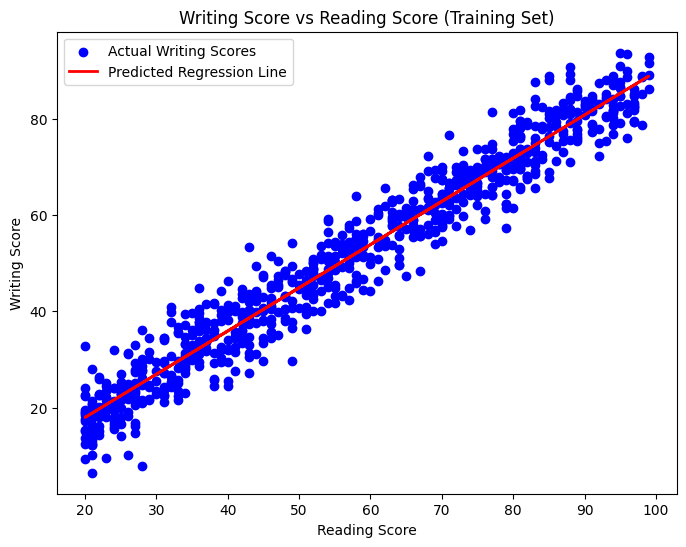

In [ ]:
# Plot training set results
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color='blue', label='Actual Writing Scores')  # Actual values
plt.plot(X_train, regressor.predict(X_train), color='red', linewidth=2, label='Predicted Regression Line')  # Predicted
plt.title('Writing Score vs Reading Score (Training Set)')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.legend()
plt.show()


Plot Test Set Results

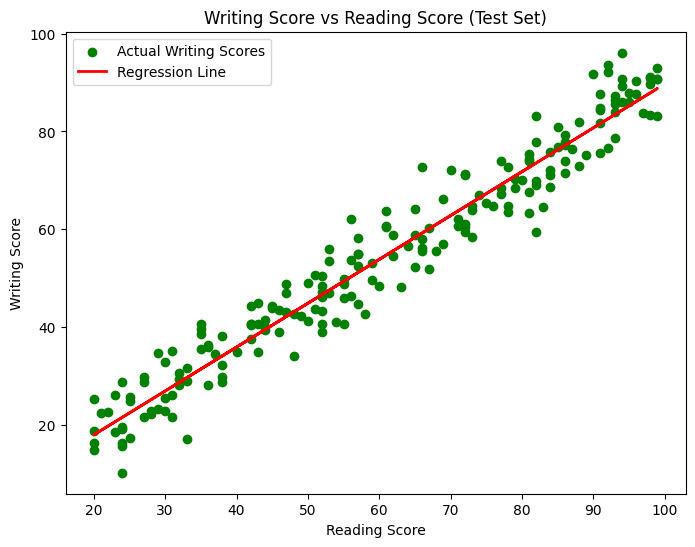

In [ ]:
# Plot test set results
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='green', label='Actual Writing Scores')  # Actual values
plt.plot(X_train, regressor.predict(X_train), color='red', linewidth=2, label='Regression Line')  # Use training line
plt.title('Writing Score vs Reading Score (Test Set)')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.legend()
plt.show()


In linear regression, the model learns the slope (m) and intercept (c) of the best-fit line:

The equation is:

y=m⋅x+c

Where:


y = predicted value (Writing Score)


x = independent variable (Reading Score)


m = slope / coefficient → change in y for a unit change in
𝑥


c = intercept → value of 𝑦
y when
𝑥=0


In [ ]:
# Get the slope (coefficient)
m = regressor.coef_[0]
print("Slope (m):", m)

# Get the y-intercept
c = regressor.intercept_
print("Intercept (c):", c)

# Optional: show the linear equation
print(f"Linear Equation: y = {m:.2f}*x + {c:.2f}")


Slope (m): 0.8966375083415654
Intercept (c): 0.03310452422010712
Linear Equation: y = 0.90*x + 0.03


Multiple linear regression

Select Multiple Predictors

In [ ]:
# Independent variables (predictors)
X = df[['reading score', 'math score']]

# Dependent variable
y = df['writing score']


Split into Train and Test Sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)


Train shapes: (800, 2) (800,)
Test shapes: (200, 2) (200,)


Train the Multiple Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

# Create and train model
mlr = LinearRegression()
mlr.fit(X_train, y_train)


LinearRegression()

Get Coefficients and Intercept

In [ ]:
print("Intercept (c):", mlr.intercept_)
print("Coefficients (m for each predictor):", mlr.coef_)

# Optional: show equation
print(f"Linear Equation: y = {mlr.intercept_:.2f} + {mlr.coef_[0]:.2f}*Reading + {mlr.coef_[1]:.2f}*Math")


Intercept (c): 0.04312728674292288
Coefficients (m for each predictor): [0.88122549 0.01913   ]
Linear Equation: y = 0.04 + 0.88*Reading + 0.02*Math


Predict on Test Data

In [ ]:
y_pred = mlr.predict(X_test)

# Compare actual vs predicted
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_compare.head())


        Actual  Predicted
521  60.530585  54.686133
737  10.218132  21.240660
740  53.411632  47.848742
660  43.707064  45.951768
411  40.530959  46.877986


multiple linear regression (two predictors), we can visualize predicted vs actual values using a scatter plot. In MLR, instead of a line, we usually compare predicted vs actual values on a 2D plot

Blue points → each test sample’s actual vs predicted value.

Red line → perfect prediction line (y_pred = y_actual). Points closer to this line indicate better predictions.

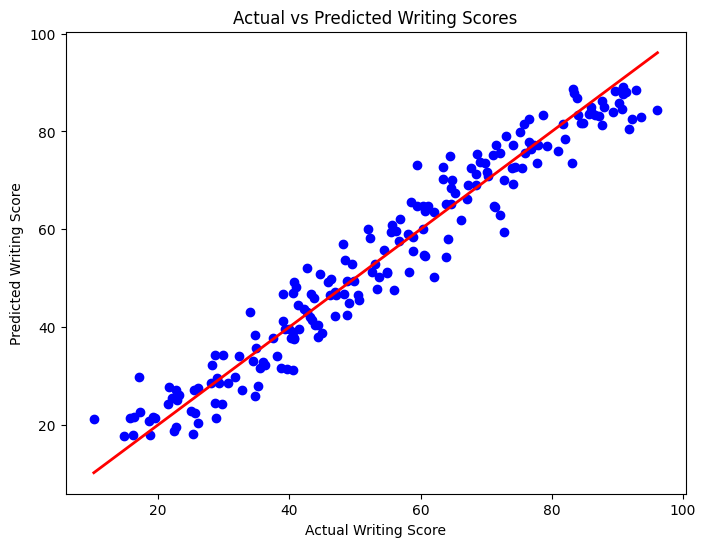

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Actual vs Predicted Writing Scores')
plt.xlabel('Actual Writing Score')
plt.ylabel('Predicted Writing Score')
plt.show()


Import 3D plotting tools

Create 3D Scatter Plot with Regression Plane

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt


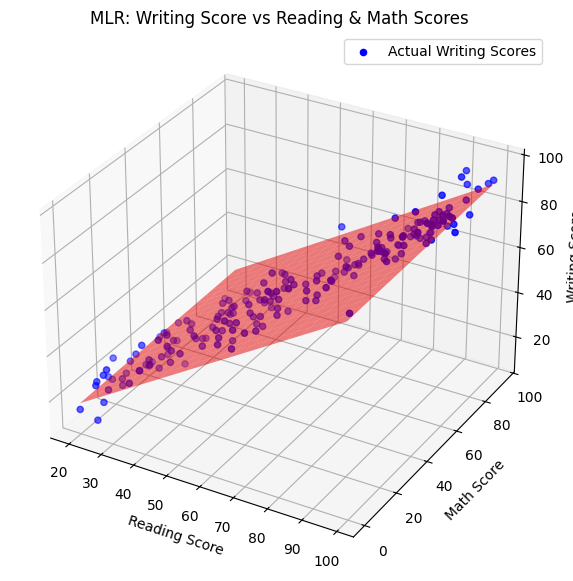

In [ ]:
# Extract predictors
X1 = X_test['reading score']
X2 = X_test['math score']

# Predicted values
y_pred = mlr.predict(X_test)

# Create figure
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Scatter actual points
ax.scatter(X1, X2, y_test, color='blue', label='Actual Writing Scores')

# Create a meshgrid for the regression plane
X1_grid, X2_grid = np.meshgrid(
    np.linspace(X1.min(), X1.max(), 20),
    np.linspace(X2.min(), X2.max(), 20)
)

# Predict values on the grid
Y_grid = mlr.intercept_ + mlr.coef_[0]*X1_grid + mlr.coef_[1]*X2_grid

# Plot the regression plane
ax.plot_surface(X1_grid, X2_grid, Y_grid, color='red', alpha=0.5)

# Labels and title
ax.set_xlabel('Reading Score')
ax.set_ylabel('Math Score')
ax.set_zlabel('Writing Score')
ax.set_title('MLR: Writing Score vs Reading & Math Scores')
ax.legend()
plt.show()


Blue points → actual test samples (Writing Score).

Red plane → regression plane predicted by the model.

Points closer to the plane → better predictions.

This gives a visual sense of how the two predictors affect Writing Score simultaneously.